In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm # Getting acces to statistical models
import statsmodels.formula.api as smf # A convenience interface for specifying models using formula strings and DataFrames
import scipy.stats as stats
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

import seaborn as sns
%matplotlib inline
#get the data
!git clone https://git.wur.nl/dijk097/ml2022_projectmbf.git data
#read csvfile
data = pd.read_csv('data/data_labeled_fixed.csv')
#remove - in name
data.columns = data.columns.str.replace("-", "")


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Cloning into 'data'...
remote: Enumerating objects: 38, done.
remote: Total 38 (delta 0), reused 0 (delta 0), pack-reused 38
Unpacking objects: 100% (38/38), done.
Checking out files: 100% (12/12), done.


## Data

In [2]:
dataweek1=data.drop(data.columns[-2],axis=1)
dataweek1.columns

Index(['Acin1', 'Actb', 'Agap1', 'Ahi1', 'Akap11', 'Akap9', 'Aldoa', 'Aldoc',
       'Ankrd12', 'Anp32a',
       ...
       'Zranb2', 'mtCo1', 'mtCytb', 'mtNd1', 'mtNd2', 'mtNd4', 'mtNd5',
       'mtRnr1', 'mtRnr2', 'CLASS'],
      dtype='object', length=453)

## Calm1 Using all cells

In [3]:
# create the training and test data
train_calm1_all, test_calm1_all = train_test_split(dataweek1, random_state=1)



In [4]:
# generate the predictors
def lm_formula(df, dependent_var, excluded_cols=[]):
  '''
  Generates the R style formula for statsmodels (patsy) given
  the dataframe, dependent variable and optional excluded columns
  as strings
  '''
  df_columns = list(df.columns.values)
  df_columns.remove(dependent_var)
  for col in excluded_cols:
    df_columns.remove(col)
  return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [5]:

# multiple regres for based on all data 
mlm_fit_calm1_all_fm = smf.ols(formula=lm_formula(train_calm1_all, 'Calm1'), data=train_calm1_all).fit()
#print(mlm_fit_calm1_all_fm.summary())

In [6]:
# select col names where p_value is more than 0.05
predictors_pval =pd.DataFrame(data = mlm_fit_calm1_all_fm.pvalues, columns=['p_val'])

sigf_predictors = predictors_pval[predictors_pval.p_val<0.05] 

print(len(sigf_predictors))

mlm_fit_calm1_all_fm.rsquared_adj




56


0.7907836258259199

In [ ]:
# Not necessary !!!!!!!!!!!!!!!
# reduced model based on all the data
#mlm_fit_calm1_all_rm = smf.ols(formula=lm_formula(train_calm1_all, 'Calm1', insg), data=train_calm1_all).fit()
#print(mlm_fit_calm1_all_rm.summary())

In [ ]:
# Use Anova to compare the 2 models
#sm.stats.anova_lm(mlm_fit_calm1_all_rm, mlm_fit_calm1_all_fm)

In [7]:
 #predict using full model all data
calm1_all_fm_pred = mlm_fit_calm1_all_fm.predict(test_calm1_all)
#predict using reduced model all data
#calm1_all_rm_pred = mlm_fit_calm1_all_rm.predict(test_calm1_all)



In [8]:
def diagnostics_plots(lm):
  """
  Plots the four diagnostic plots for lm() output.
  1) Residuals vs Fitted
  2) Normal Q-Q
  3) Scale-Location
  4) Residuals vs Leverage
  """

  fitted_values = lm.fittedvalues
  residuals = lm.resid
  s_residuals = lm.resid_pearson
  #s_residuals = lm.get_influence().resid_studentized_external

  fig, axes = plt.subplots(2, 2, figsize=(10, 10))

  # Plot 1: Residuals vs fitted
  sns.regplot(x=fitted_values, y=residuals, ax=axes[0, 0], marker='.', lowess=True, line_kws={"color": "red"})
  axes[0, 0].set_xlabel("Fitted Values", fontsize=15)
  axes[0, 0].set_ylabel("Residuals", fontsize=15)
  axes[0, 0].set_title('Residuals vs fitted', fontsize=15)
  axes[0, 0].grid()

  # Plot 2: Standardized residuals
  sm.qqplot(residuals, ax=axes[0, 1],fit=True, line="45", color=sns.color_palette()[0], marker='.')
  axes[0, 1].set_xlabel("Theoretical Quantiles", fontsize=15)
  axes[0, 1].set_ylabel("Studentized residuals", fontsize=15)
  axes[0, 1].set_title('Normal Q-Q', fontsize=15)
  axes[0, 1].grid()

  # Plot 3: Scale-Location
#  sns.regplot(x=fitted_values, y = np.sqrt(s_residuals), ax=axes[1, 0], marker='.', lowess=True, line_kws={"color": "red"})
  sns.regplot(x=fitted_values, y = s_residuals, ax=axes[1, 0], marker='.', lowess=True, line_kws={"color": "red"})
  axes[1, 0].set_xlabel('Fitted values', fontsize=15)
#  axes[1, 0].set_ylabel('sqrt( Studentized residuals )', fontsize=15)
  axes[1, 0].set_ylabel('Studentized residuals', fontsize=15)
  axes[1, 0].set_title('Scale-Location', fontsize=15)
  axes[1, 0].grid()

  # Plot 4: Influence Plot
  sm.graphics.influence_plot(lm, ax=axes[1,1], criterionstr='Cooks', size = 1)
  axes[1, 1].set_xlabel('h leverage', fontsize=15)
  axes[1, 1].set_ylabel('Studentized residuals', fontsize=15)
  axes[1, 1].set_title('Residuals vs leverage', fontsize=15)
  axes[1,1].grid()

  plt.tight_layout()
  plt.show()

Diagnostic plots for the full model all data


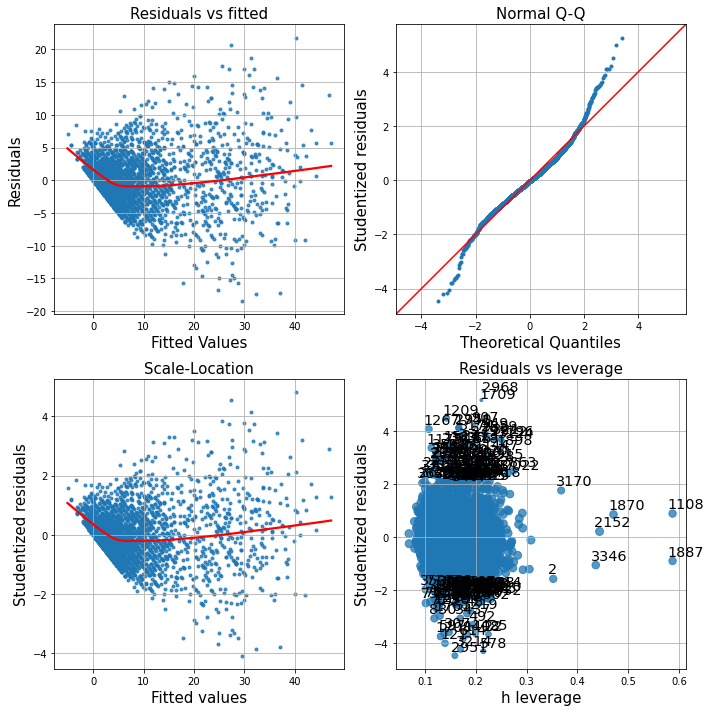

In [67]:
print("Diagnostic plots for the full model all data")
diagnostics_plots(mlm_fit_calm1_all_fm)
#print("Diagnostic plots for the reduced model all data")
#diagnostics_plots(mlm_fit_calm1_all_fm)

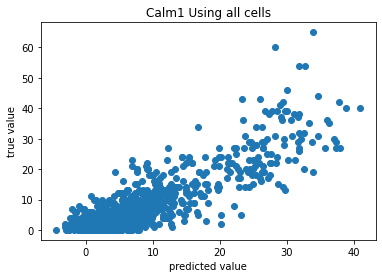

In [57]:
plt.scatter(x=calm1_all_fm_pred,y=test_calm1_all.Calm1)
plt.gca().update(dict(title="Calm1 Using all cells",xlabel="predicted value", ylabel="true value"))
plt.show()


## Calm1 Using Rod Bipolar

In [10]:
# creat calm1 data where CLASS == 'Rob Bipolar'
dataweek1_calm1=dataweek1[dataweek1['CLASS']=='Rod Bipolar']

In [11]:
# create the training and test data

train_calm1, test_calm1 = train_test_split(dataweek1_calm1, random_state=1)

In [12]:
# full model based on data without rob bipolar
mlm_fit_calm1_rob_fm = smf.ols(formula=lm_formula(train_calm1, 'Calm1'), data=train_calm1).fit()
print(mlm_fit_calm1_rob_fm.summary())

# works need explanation for the problem

                            OLS Regression Results                            
Dep. Variable:                  Calm1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 21 Feb 2022   Prob (F-statistic):                nan
Time:                        18:10:10   Log-Likelihood:                 10726.
No. Observations:                 375   AIC:                        -2.070e+04
Df Residuals:                       0   BIC:                        -1.923e+04
Df Model:                         374                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6344        inf          0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1376: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


In [44]:
# predict using full model all data
calm1_rob_fm_pred = mlm_fit_calm1_rob_fm.predict(test_calm1)
#predict using reduced model all data
#calm1_rob_rm_pred = mlm_fit_calm1_all_rm.predict(test_calm1_all)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:708: RuntimeWarning: divide by zero encountered in true_divide
  cooks_d2 *= hii / (1 - hii)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1376: RuntimeWarning: in

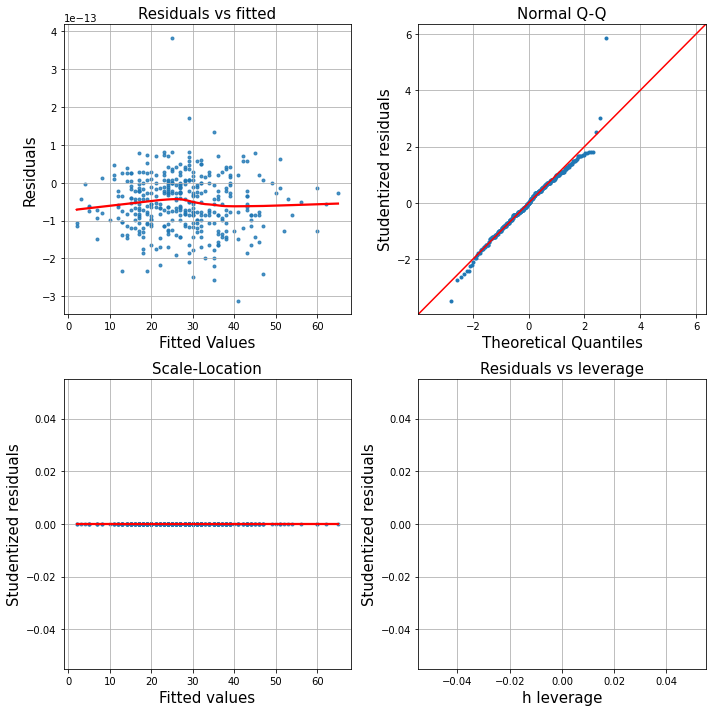

In [69]:
diagnostics_plots(mlm_fit_calm1_rob_fm)

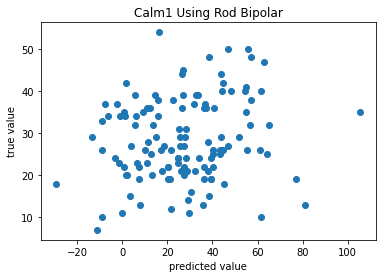

In [56]:
#compare the predicted and the true value with the subdataset
plt.scatter(x=calm1_rob_fm_pred,y=test_calm1.Calm1)
plt.gca().update(dict(title="Calm1 Using Rod Bipolar",xlabel="predicted value", ylabel="true value"))
plt.show()

## Malat1 Using all cells

In [14]:
# create the training and test data
train_malat1_all, test_malat1_all = train_test_split(dataweek1, random_state=1)

In [21]:
# multiple regres for based on all data 
mlm_fit_malat1_all_fm = smf.ols(formula=lm_formula(train_malat1_all, 'Malat1'), data=train_calm1_all).fit()
print(mlm_fit_calm1_all_fm.summary())

In [22]:
# predict using full model all data
malat1_all_fm_pred = mlm_fit_malat1_all_fm.predict(test_malat1_all)

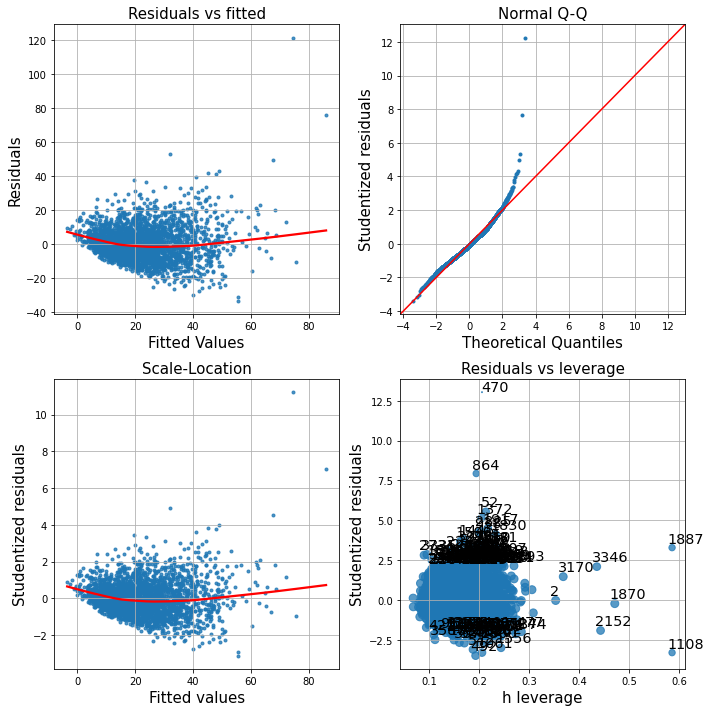

In [70]:
diagnostics_plots(mlm_fit_malat1_all_fm)

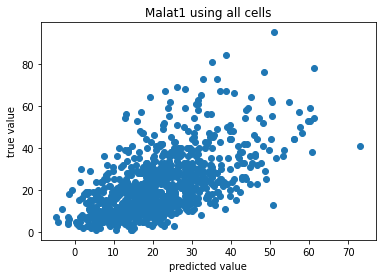

In [53]:
#compare the predicted and the true value with the subdataset
plt.scatter(x=malat1_all_fm_pred,y=test_malat1_all.Malat1)
plt.gca().update(dict(title='Malat1 using all cells',xlabel="predicted value", ylabel="true value"))
plt.show()

## Malat1 using Amacrine cells

In [46]:
# creat calm1 data where CLASS == 'Rob Bipolar'
dataweek1_malat1_amacrine = dataweek1[dataweek1['CLASS']=='Amacrine']

In [47]:
# create the training and test data

train_malat1_amacrine, test_malat1_amacrine = train_test_split(dataweek1_malat1_amacrine, random_state=1)

In [49]:
# multiple regres for based on all data 
mlm_fit_malat1_amacrine_fm = smf.ols(formula=lm_formula(train_malat1_amacrine, 'Malat1'), data=train_malat1_amacrine).fit()
print(mlm_fit_malat1_amacrine_fm.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1376: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


                            OLS Regression Results                            
Dep. Variable:                 Malat1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 21 Feb 2022   Prob (F-statistic):                nan
Time:                        18:33:01   Log-Likelihood:                 2745.5
No. Observations:                  96   AIC:                            -5299.
Df Residuals:                       0   BIC:                            -5053.
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3065        inf          0

In [50]:
# predict using full model all data
malat1_amacrine_fm_pred = mlm_fit_malat1_amacrine_fm.predict(test_malat1_amacrine)


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:708: RuntimeWarning: divide by zero encountered in true_divide
  cooks_d2 *= hii / (1 - hii)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1376: RuntimeWarning: in

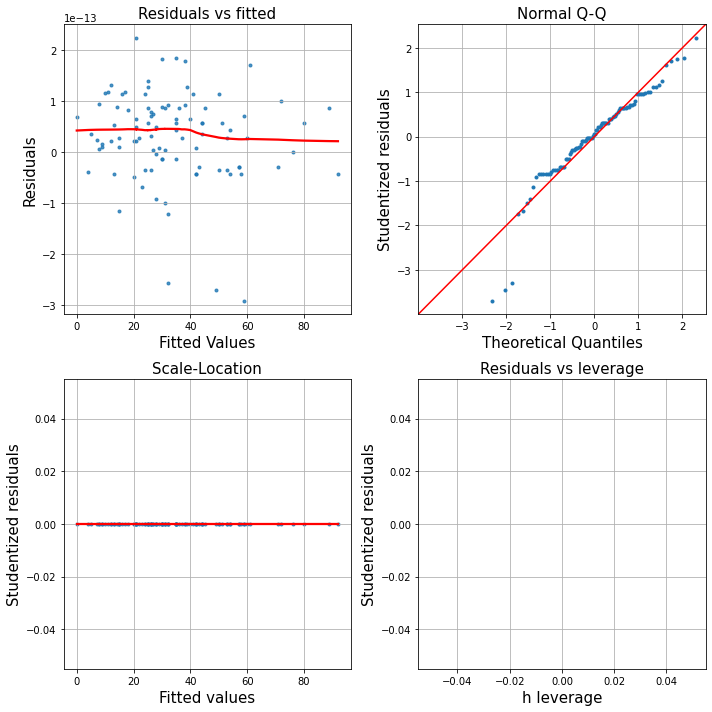

In [71]:
diagnostics_plots(mlm_fit_malat1_amacrine_fm)

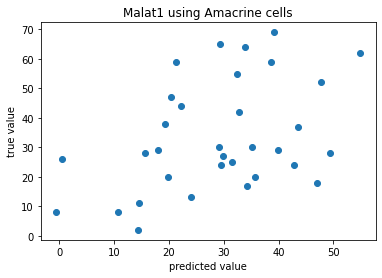

In [55]:
#compare the predicted and the true value with the subdataset
plt.scatter(x=malat1_amacrine_fm_pred,y=test_malat1_amacrine.Malat1)
plt.gca().update(dict(title="Malat1 using Amacrine cells", xlabel="predicted value", ylabel="true value"))
plt.show()

## Model Performance Evaluation

### Using MSE

In [58]:
# calm1 using all cells

calm1_all = mean_squared_error(test_calm1_all.Calm1, calm1_all_fm_pred)
calm1_all

25.201480296220574

In [59]:
# calm1 using Rod Bipolar
calm1_rod = mean_squared_error(test_calm1.Calm1, calm1_rob_fm_pred)

calm1_rod

507.22880447360535

In [60]:
# Malat1 using all cells
malat1_all = mean_squared_error(test_malat1_all.Malat1, malat1_all_fm_pred)
malat1_all

143.6746978651355

In [61]:
# Malat1 using amacrine
malat1_amacrine = mean_squared_error(test_malat1_amacrine.Malat1, malat1_amacrine_fm_pred)
malat1_amacrine


328.68328216069096

In [62]:
# Create mse dataframe
mse = [['calm1_all', calm1_all], ['calm1_rod', calm1_rod], ['malat1_all', malat1_all],\
       ['malat1_amacrine', malat1_amacrine]]
mse_df = pd.DataFrame(mse, columns=['Model', 'MSE'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scatterplot of Model MSE from test data')

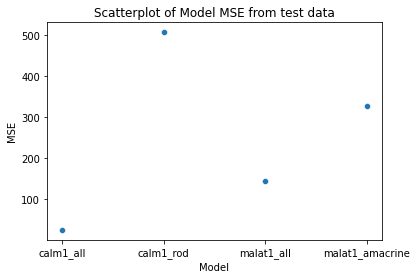

In [63]:
#plot mse
sns.scatterplot('Model', 'MSE', data=mse_df)
plt.title('Scatterplot of Model MSE from test data')

#MSE with different number of predictors

In [64]:
x_variables=list(dataweek1.columns)
x_variables.remove("Malat1")
x_variables.remove("CLASS")
para=[]
MSE_full=[]
MSE_sub=[]
for i in range(len(x_variables)):
    para.append(x_variables[i:])
print(len(para))
for i in range(len(para)):
  formula1='Malat1 ~' 
  formula1=formula1+"+".join(para[i])
  #predict with full dataframe
  lm_fit1_Malat1 = smf.ols(formula=formula1, data=train_malat1_all).fit()
  lm_fit1_Malat1_predict=lm_fit1_Malat1.predict(test_malat1_all)
  MSE_full.append(mean_squared_error(test_malat1_all.Malat1,lm_fit1_Malat1_predict))
  #predict with the sub dataframe
  lm_fit2_Malat1 = smf.ols(formula=formula1, data=train_malat1_amacrine).fit()
  lm_fit2_Malat1_predict=lm_fit2_Malat1.predict(test_malat1_amacrine)
  MSE_sub.append(mean_squared_error(test_malat1_amacrine.Malat1,lm_fit2_Malat1_predict))

451


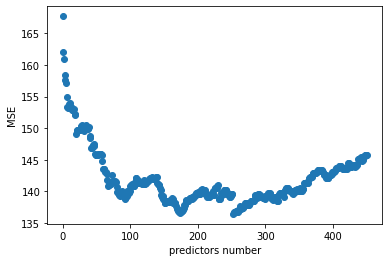

In [65]:
df=list(range(len(MSE_full)))
MSE_full.reverse()
plt.scatter(x=df,y=MSE_full)
plt.gca().update(dict( xlabel="predictors number", ylabel="MSE"))
plt.show()

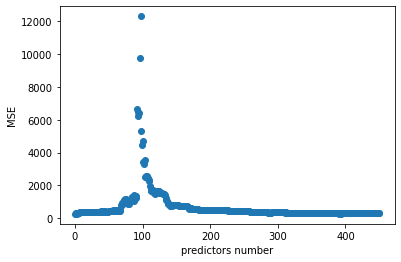

In [66]:
df=list(range(len(MSE_sub)))
MSE_sub.reverse()
plt.scatter(x=df,y=MSE_sub)
plt.gca().update(dict( xlabel="predictors number", ylabel="MSE"))
plt.show()